<a href="https://colab.research.google.com/github/quickgrid/CodeLab/blob/master/computer_vision/OpenCV_Numpy_Scipy_Image_Convolution_With_Custom_Filter_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://cdn.pixabay.com/photo/2014/03/29/09/17/cat-300572_960_720.jpg" -O "1.jpg"

--2021-03-29 14:28:57--  https://cdn.pixabay.com/photo/2014/03/29/09/17/cat-300572_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142786 (139K) [image/jpeg]
Saving to: ‘1.jpg’

1.jpg               100%[===================>] 139.44K  --.-KB/s    in 0.02s   

2021-03-29 14:28:57 (8.40 MB/s) - ‘1.jpg’ saved [142786/142786]



(720, 858)


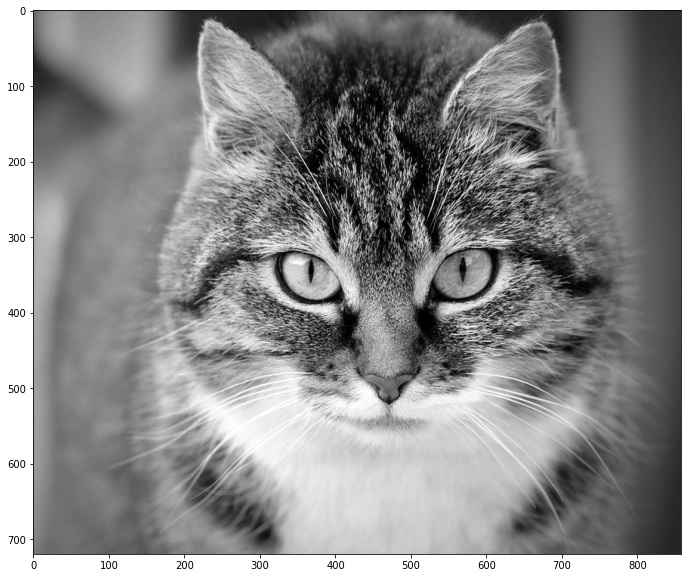

In [28]:
import cv2
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np


im = cv2.imread('1.jpg', 0)
print(im.shape)
#plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(20,10)) 
plt.imshow(im, cmap='gray')
plt.show()

(4, 4)


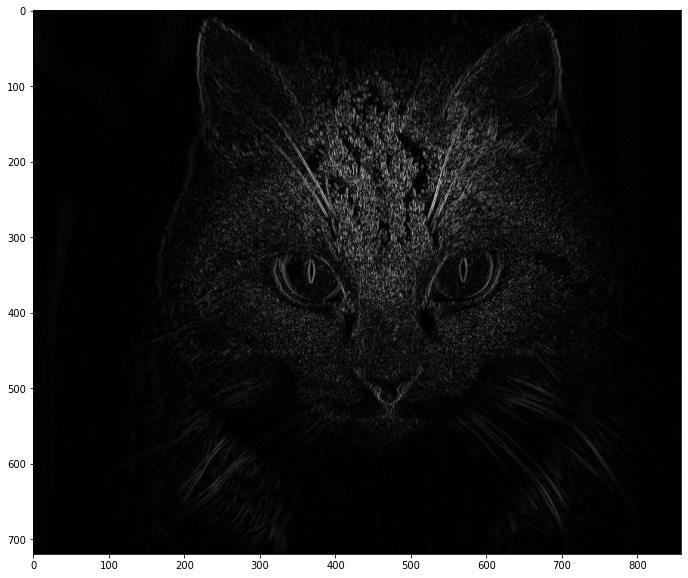

In [92]:
filter = np.array([
          [0, 1, -1, 0],
          [1, 3, -3, -1],
          [1, 3, -3, -1],
          [0, 1, -1, 0]
          ])

print(filter.shape)


grad = signal.convolve2d(im, filter, boundary='symm', mode='same')


plt.figure(figsize=(20,10)) 
plt.imshow(np.absolute(grad), cmap='gray')
plt.show()

In [128]:
import imageio

images = []

for i in range(10):

  multiplier = np.random.randint(-20, 0)
  #multiplier = np.random.randint(-20, 20)
  

  # filter = np.array([
  #         [-i, 0, i],
  #         [-i * multiplier, 0, i * multiplier],
  #         [-i, 0, i]
  #         ])

  filter = np.array([
          [0, 1, -1, 0],
          [1, i * multiplier, -i * multiplier, -1],
          [1, i * multiplier, -i * multiplier, -1],
          [0, 1, -1, 0]
          ])

  grad = signal.convolve2d(im, filter, boundary='symm', mode='same')

  #print(grad)
  images.append(grad)
  #images.append(np.absolute(grad))

imageio.mimsave('/content/processed.gif', images, fps=1)

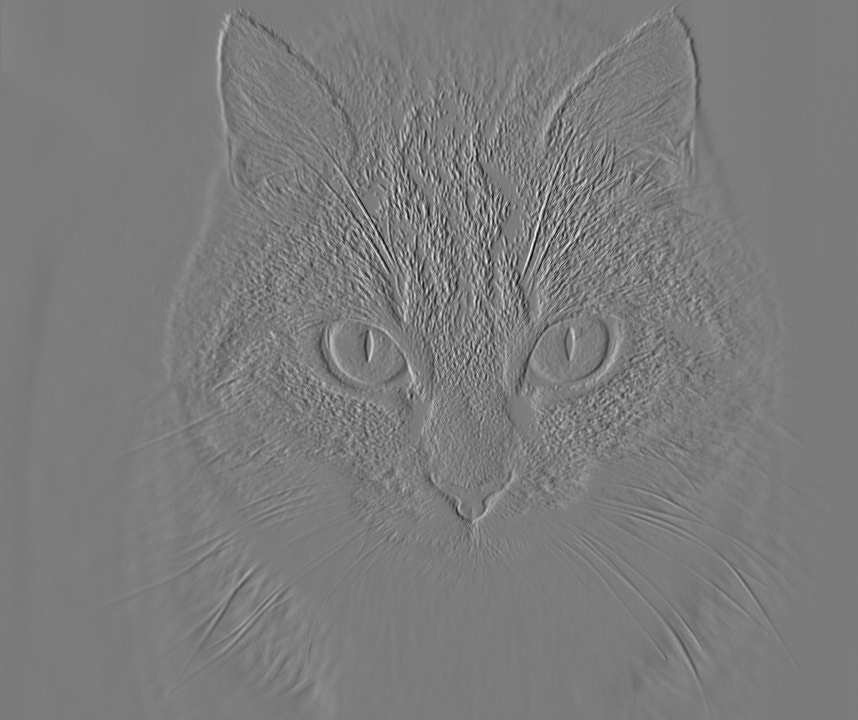

In [129]:
from IPython.display import Image
Image(open('processed.gif','rb').read())